In [1]:
import pandas as pd 
import numpy as np

In [2]:
#Data loading
cli = pd.read_csv('CLI_OCDE.csv', encoding='latin1', sep=';')
cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164011 entries, 0 to 164010
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   STRUCTURE                164011 non-null  object 
 1   STRUCTURE_ID             164011 non-null  object 
 2   STRUCTURE_NAME           164011 non-null  object 
 3   ACTION                   164011 non-null  object 
 4   REF_AREA                 164011 non-null  object 
 5   Zone de référence        164011 non-null  object 
 6   FREQ                     164011 non-null  object 
 7   Fréquence d'observation  164011 non-null  object 
 8   MEASURE                  164011 non-null  object 
 9   Mesure                   164011 non-null  object 
 10  UNIT_MEASURE             164011 non-null  object 
 11  Unité de mesure          164011 non-null  object 
 12  ACTIVITY                 164011 non-null  object 
 13  Activité économique      164011 non-null  object 
 14  EDIT

In [3]:
#Deleting non informative columns
print(cli.nunique())
cli =  cli.loc[:, cli.nunique() > 1]

#EDITION and edition same info
cli = cli.drop(columns=['Édition'])

cli.nunique()

STRUCTURE                     1
STRUCTURE_ID                  1
STRUCTURE_NAME                1
ACTION                        1
REF_AREA                      1
Zone de référence             1
FREQ                          1
Fréquence d'observation       1
MEASURE                       1
Mesure                        1
UNIT_MEASURE                  1
Unité de mesure               1
ACTIVITY                      1
Activité économique           1
EDITION                     287
Édition                     287
TIME_PERIOD                 781
Période temporelle            0
OBS_VALUE                  1959
Valeur d'observation          0
OBS_STATUS                    1
Statut d'observation          1
UNIT_MULT                     1
Multiplicateur d'unité        1
DECIMALS                      1
Décimales                     1
BASE_PER                      0
Période de base               0
dtype: int64


EDITION         287
TIME_PERIOD     781
OBS_VALUE      1959
dtype: int64

In [4]:
# Convertir les colonnes 'Édition' et 'TIME_PERIOD' au format datetime
cli['EDITION'] = pd.to_datetime(cli['EDITION'], format='%Y%m')
cli['TIME_PERIOD'] = pd.to_datetime(
    cli['TIME_PERIOD'],
    format='%d/%m/%Y',   # jour/mois/année
    dayfirst=True        # au cas où, pour forcer JJ/MM/AAAA
)


In [5]:
cli.head()

,EDITION,TIME_PERIOD,OBS_VALUE
0,2010-02-01,2010-01-01,107.46
1,2010-02-01,2009-12-01,106.67
2,2010-02-01,2009-11-01,105.75
3,2010-02-01,2009-10-01,104.69
4,2010-02-01,2009-09-01,103.50


In [6]:
# Obtenir les valeurs maximales et minimales
max_edition = cli['EDITION'].max()
min_edition = cli['EDITION'].min()
max_time_period = cli['TIME_PERIOD'].max()
min_time_period = cli['TIME_PERIOD'].min()

print("Valeur maximale de EDITION:", max_edition)
print("Valeur minimale de EDITION:", min_edition)
print("Valeur maximale de TIME_PERIOD:", max_time_period)
print("Valeur minimale de TIME_PERIOD:", min_time_period)

Valeur maximale de EDITION: 2025-02-01 00:00:00
Valeur minimale de EDITION: 2001-01-01 00:00:00
Valeur maximale de TIME_PERIOD: 2025-01-01 00:00:00
Valeur minimale de TIME_PERIOD: 1960-01-01 00:00:00


In [7]:
pivot_cli = cli.pivot(index='TIME_PERIOD', columns='EDITION', values='OBS_VALUE')
pivot_cli = pivot_cli.dropna(how='all')
pivot_cli.head()

EDITION,2001-01-01,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,2001-08-01,2001-09-01,2001-10-01,...,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Gestion des valeurs manquantes

In [8]:
first_row = pivot_cli.iloc[0]

first_row.isna().sum()

248

In [9]:
# Sélectionner la première ligne et supprimer les valeurs nulles
first_row_non_null = pivot_cli.iloc[0].dropna()

# Convertir en DataFrame pour l'affichage
first_row_non_null_df = first_row_non_null.to_frame().transpose()

print(first_row_non_null_df)

EDITION     2005-09-01  2005-10-01  2005-11-01  2005-12-01  2006-01-01  \
1960-01-01       98.47       98.48       98.48       98.48       98.47   

EDITION     2006-02-01  2006-03-01  2006-04-01  2006-05-01  2006-06-01  ...  \
1960-01-01       98.49       98.48       98.48       98.47       98.47  ...   

EDITION     2008-02-01  2008-03-01  2008-04-01  2008-05-01  2008-06-01  \
1960-01-01        99.4        99.4       99.41       99.41       99.42   

EDITION     2008-07-01  2008-08-01  2008-09-01  2008-10-01  2008-11-01  
1960-01-01       99.41        99.4        99.4        99.4       99.39  

[1 rows x 39 columns]


Alors pourquoi on a des valeurs pour 1960 que lors des révisions de 2005 à 2008 c'est un mystère mais bon on pourra les virer dans tous les cas pour avoir des données propres !!!

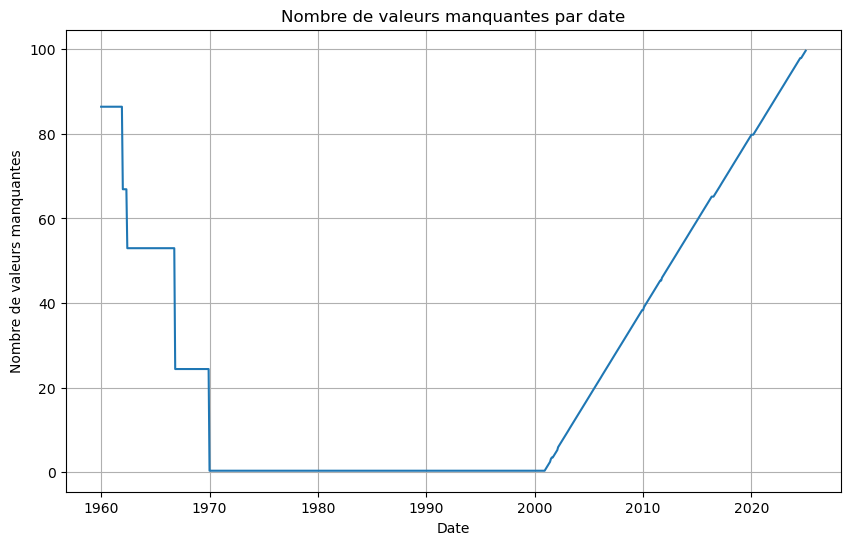

In [10]:
import matplotlib.pyplot as plt

# Calculer le nombre de valeurs manquantes par ligne
missing_count = pivot_cli.isnull().mean(axis=1) * 100

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(missing_count.index, missing_count.values, linestyle='-')
plt.title('Nombre de valeurs manquantes par date')
plt.xlabel('Date')
plt.ylabel('Nombre de valeurs manquantes')
plt.grid(True)
plt.show()


In [11]:
pivot_cli_filtered = pivot_cli[pivot_cli.index >= '1970-01-01']
pivot_cli_filtered.head()

EDITION,2001-01-01,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,2001-08-01,2001-09-01,2001-10-01,...,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
1970-01-01,98.01,98.01,98.02,98.02,98.02,98.02,98.02,98.02,98.02,98.15,...,101.45,101.45,101.42,NaN,101.43,101.43,101.42,101.42,101.42,101.41
1970-02-01,97.45,97.45,97.46,97.45,97.45,97.45,97.45,97.44,97.44,97.58,...,101.16,101.17,101.14,NaN,101.15,101.15,101.14,101.14,101.14,101.13
1970-03-01,95.76,95.74,95.74,95.72,95.72,95.72,95.71,95.71,95.70,95.83,...,100.86,100.86,100.84,NaN,100.85,100.85,100.84,100.84,100.84,100.83
1970-04-01,95.16,95.14,95.14,95.12,95.11,95.11,95.10,95.10,95.08,95.21,...,100.53,100.54,100.52,NaN,100.53,100.53,100.52,100.52,100.52,100.51
1970-05-01,94.75,94.73,94.73,94.70,94.69,94.69,94.68,94.68,94.66,94.79,...,100.21,100.21,100.21,NaN,100.21,100.21,100.21,100.20,100.20,100.20


In [12]:
completely_missing_columns = pivot_cli_filtered.columns[pivot_cli_filtered.isnull().all()]

print("Colonnes complètement peuplées de valeurs manquantes :")
print(completely_missing_columns)

Colonnes complètement peuplées de valeurs manquantes :
DatetimeIndex(['2024-08-01'], dtype='datetime64[ns]', name='EDITION', freq=None)


On a une anomalie de données manquantes pour la date de révision de Aout 2024. Nous ferons donc un copier coller des valeurs de Juillet pour cette date, et nous vérifierons que cette anomalie est bien présente dans le dataset de base 

In [13]:
selected_data = cli[cli['EDITION'] == '2024-08-01']

display(selected_data)

,EDITION,TIME_PERIOD,OBS_VALUE
159831,2024-08-01,NaT,NaN


In [14]:
pivot_cli_filtered['2024-08-01'] = pivot_cli_filtered['2024-08-01'].fillna(pivot_cli_filtered['2024-07-01'])

display(pivot_cli_filtered)

C:\Users\vadim\AppData\Local\Temp\ipykernel_17112\1833495294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_cli_filtered['2024-08-01'] = pivot_cli_filtered['2024-08-01'].fillna(pivot_cli_filtered['2024-07-01'])


EDITION,2001-01-01,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,2001-08-01,2001-09-01,2001-10-01,...,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
1970-01-01,98.01,98.01,98.02,98.02,98.02,98.02,98.02,98.02,98.02,98.15,...,101.45,101.45,101.42,101.42,101.43,101.43,101.42,101.42,101.42,101.41
1970-02-01,97.45,97.45,97.46,97.45,97.45,97.45,97.45,97.44,97.44,97.58,...,101.16,101.17,101.14,101.14,101.15,101.15,101.14,101.14,101.14,101.13
1970-03-01,95.76,95.74,95.74,95.72,95.72,95.72,95.71,95.71,95.70,95.83,...,100.86,100.86,100.84,100.84,100.85,100.85,100.84,100.84,100.84,100.83
1970-04-01,95.16,95.14,95.14,95.12,95.11,95.11,95.10,95.10,95.08,95.21,...,100.53,100.54,100.52,100.52,100.53,100.53,100.52,100.52,100.52,100.51
1970-05-01,94.75,94.73,94.73,94.70,94.69,94.69,94.68,94.68,94.66,94.79,...,100.21,100.21,100.21,100.21,100.21,100.21,100.21,100.20,100.20,100.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,99.46,99.22,99.38,99.39,99.39
2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.23,99.43,99.45,99.48
2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.48,99.54,99.60


On a bien ce problème dans les données de base, on va donc procéder comme indiqué précédemment pour remplacer ces valeurs manquantes

#### Etude des valeurs manquantes en fin de série


In [15]:
# Méthode simple avec last_valid_index()
last_non_nan_index = {
    col: pivot_cli_filtered[col].last_valid_index()
    for col in pivot_cli_filtered.columns
}





In [16]:

# last_non_index : dict { édition_timestamp: last_valid_index_timestamp }

# Version compacte avec comprehension
mismatch_count = sum(
    1
    for ed, last in last_non_nan_index.items()
    if last != (ed - pd.DateOffset(months=1))
)
print("Nombre de colonnes en décalage :", mismatch_count)


Nombre de colonnes en décalage : 214


In [17]:
pivot_cli_filtered.shape

(661, 287)

214 colonnes sur 287 sont concernées par ce manque de données et cela vient des données du CLI pas de la conversion. Le pb est que ce seront ces données qui seront utilisées en target donc on ne peut pas les remplacer par n'importe quoi. Je pense que le mieux est de remplacer par la valeur de la vintage d'après.

In [18]:
cli[cli['EDITION'] == '2015-12-01'].sort_values(by='TIME_PERIOD', ascending=False)

,EDITION,TIME_PERIOD,OBS_VALUE
30473,2015-12-01,2015-10-01,100.86
30474,2015-12-01,2015-09-01,100.80
30475,2015-12-01,2015-08-01,100.72
30476,2015-12-01,2015-07-01,100.64
30477,2015-12-01,2015-06-01,100.56
...,...,...,...
31018,2015-12-01,1970-05-01,99.92
31019,2015-12-01,1970-04-01,100.02
31020,2015-12-01,1970-03-01,100.12
31021,2015-12-01,1970-02-01,100.21


In [19]:
# On part de cli_filtered : DataFrame indexé par des dates mensuelles,
# colonnes = dates d'édition (type DatetimeIndex)
cli_vintage = pivot_cli_filtered.copy()

# Liste ordonnée des colonnes pour repérer la "colonne suivante"
cols = list(cli_vintage.columns)

for i, col in enumerate(cols):
    # On cherche la dernière date non-NaN dans cette colonne
    last_valid = cli_vintage[col].last_valid_index()
    # date attendue : un mois avant l'édition
    expected = col - pd.DateOffset(months=1)

    if last_valid != expected:
        # On construit la liste des dates manquantes à remplir
        start = last_valid + pd.DateOffset(months=1) if last_valid is not None else cli_vintage.index.min()
        missing_dates = pd.date_range(start=start, end=expected, freq='MS')

        for dt in missing_dates:
            # On cherche dans les colonnes suivantes la première valeur non-NaN
            for next_col in cols[i+1:]:
                candidate = cli_vintage.at[dt, next_col]
                if pd.notna(candidate):
                    cli_vintage.at[dt, col] = candidate
                    break
            # si on sort de la boucle sans break, la valeur reste NaN

# cli_vintage contient maintenant le DataFrame où chaque colonne a ses mois manquants
# comblés à partir des colonnes suivantes


In [20]:
print(cli_vintage.shape)

# Méthode simple avec last_valid_index()
last_non_nan_index = {
    col: cli_vintage[col].last_valid_index()
    for col in cli_vintage.columns
}

# Version compacte avec comprehension
mismatch_count = sum(
    1
    for ed, last in last_non_nan_index.items()
    if last != (ed - pd.DateOffset(months=1))
)
print("Nombre de colonnes en décalage :", mismatch_count)

(661, 287)
Nombre de colonnes en décalage : 0


In [21]:
# 1) Dérivée mensuelle (différence) de chaque colonne
cli_diff_vintage = cli_vintage.diff()
cli_diff_vintage.bfill(inplace=True)  # Remplir les NaN avec la valeur suivante

# 2) Binarisation : 1 si dérivée >= 0, sinon 0
cli_diff_bin_vintage = (cli_diff_vintage >= 0).astype(int)
cli_diff_bin_vintage[cli_diff_vintage.isna()] = np.nan

In [22]:
cli_diff_vintage

EDITION,2001-01-01,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,2001-08-01,2001-09-01,2001-10-01,...,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
1970-01-01,-0.56,-0.56,-0.56,-0.57,-0.57,-0.57,-0.57,-0.58,-0.58,-0.57,...,-0.29,-0.28,-0.28,-0.28,-0.28,-0.28,-0.28,-0.28,-0.28,-0.28
1970-02-01,-0.56,-0.56,-0.56,-0.57,-0.57,-0.57,-0.57,-0.58,-0.58,-0.57,...,-0.29,-0.28,-0.28,-0.28,-0.28,-0.28,-0.28,-0.28,-0.28,-0.28
1970-03-01,-1.69,-1.71,-1.72,-1.73,-1.73,-1.73,-1.74,-1.73,-1.74,-1.75,...,-0.30,-0.31,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30
1970-04-01,-0.60,-0.60,-0.60,-0.60,-0.61,-0.61,-0.61,-0.61,-0.62,-0.62,...,-0.33,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32
1970-05-01,-0.41,-0.41,-0.41,-0.42,-0.42,-0.42,-0.42,-0.42,-0.42,-0.42,...,-0.32,-0.33,-0.31,-0.31,-0.32,-0.32,-0.31,-0.32,-0.32,-0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.11,0.01,0.04,0.06,0.07
2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.05,0.06,0.09
2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.09,0.12


In [23]:
cli_diff_bin_vintage

EDITION,2001-01-01,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,2001-08-01,2001-09-01,2001-10-01,...,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1970-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1970-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1970-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1970-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1
2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1
2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1


In [24]:
# Exporter le DataFrame en fichier CSV
#cli_vintage.to_csv('cli_vintage.csv')
'''cli_diff_vintage.to_csv('cli_diff_vintage.csv')
cli_diff_bin_vintage.to_csv('cli_diff_bin_vintage.csv')'''


"cli_diff_vintage.to_csv('cli_diff_vintage.csv')\ncli_diff_bin_vintage.to_csv('cli_diff_bin_vintage.csv')"